In [6]:
#Import libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = pd.read_csv("Unemployment_in_India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [29]:
df2.rename(columns={'Region': 'State', ' Date': 'Date',' Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
print("\nInfo:")
print(df2.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   State                                     267 non-null    object        
 1   Date                                      267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3   Unemployment Rate                         267 non-null    float64       
 4    Estimated Employed                       267 non-null    int64         
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), floa

In [49]:
df2.rename(columns={'Region': 'State', ' Date': 'Date', ' Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Unemployment Rate                        267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [50]:
df1.rename(columns=lambda col: col.strip(), inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None


In [8]:
print(df.head())

            State       Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh 2019-05-31   Monthly                         3.65   
1  Andhra Pradesh 2019-06-30   Monthly                         3.05   
2  Andhra Pradesh 2019-07-31   Monthly                         3.75   
3  Andhra Pradesh 2019-08-31   Monthly                         3.32   
4  Andhra Pradesh 2019-09-30   Monthly                         5.17   

   Estimated Employed  Estimated Labour Participation Rate Region  
0          11999139.0                                43.24  Rural  
1          11755881.0                                42.05  Rural  
2          12086707.0                                43.50  Rural  
3          12285693.0                                43.97  Rural  
4          12256762.0                                44.68  Rural  


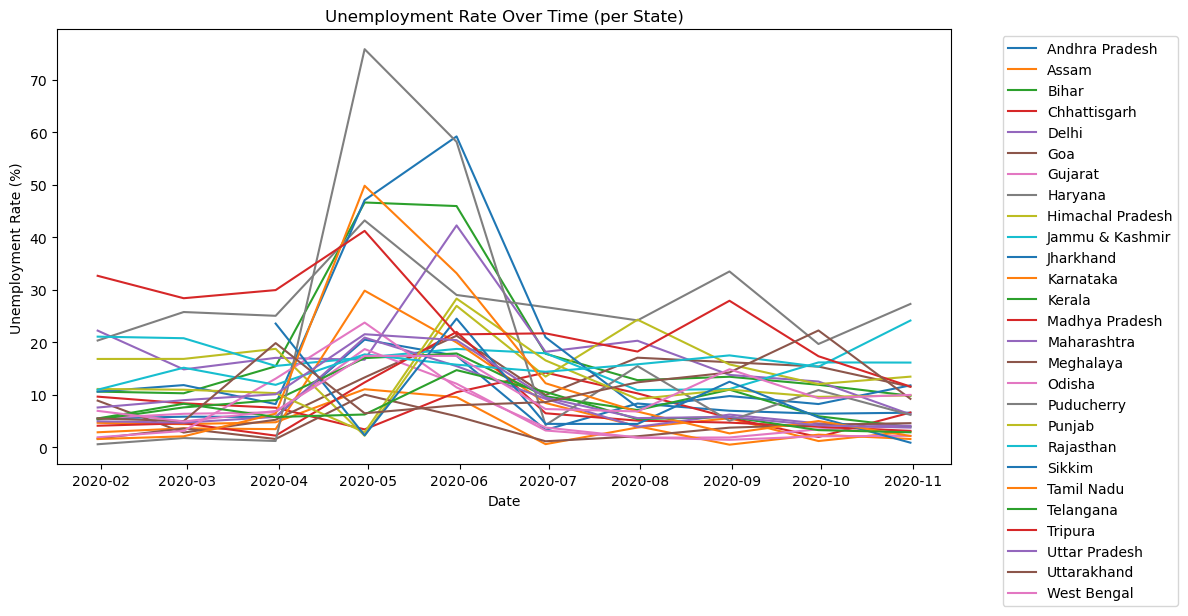

In [20]:
#Line Chart - Unemployment rate over time
plt.figure(figsize=(12, 6))
for state in df2['State'].unique():
    state_data = df2[df2['State'] == state]
    plt.plot(state_data['Date'], state_data['Unemployment Rate'], label=state)
plt.title("Unemployment Rate Over Time (per State)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

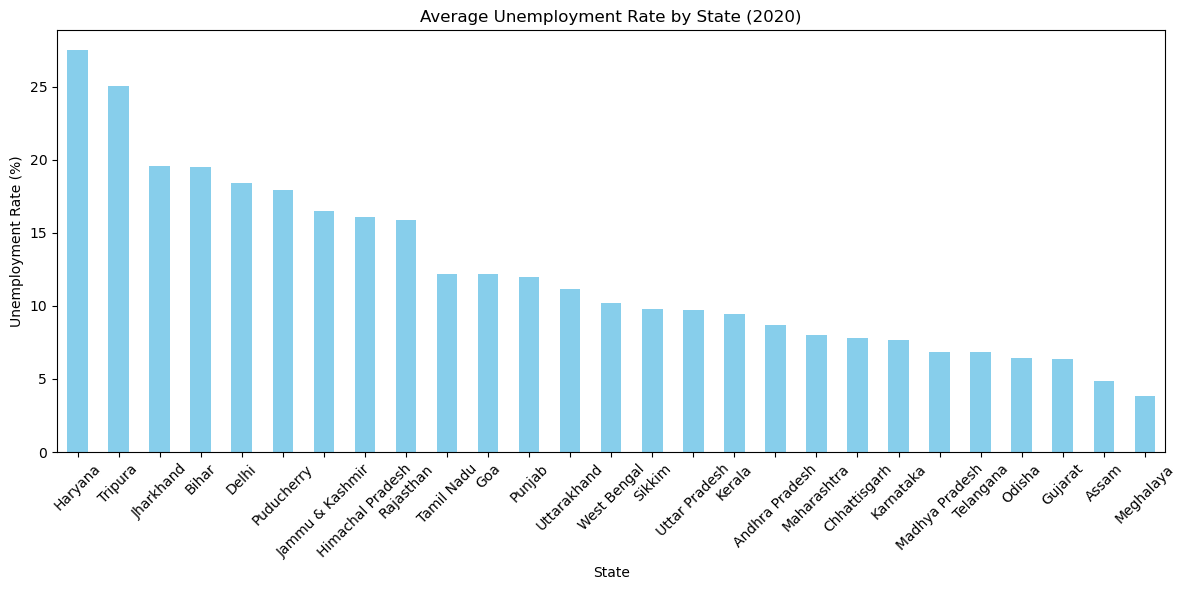

In [21]:
#Bar Chart - Average unemployment by state
avg_unemp_by_state = df2.groupby("State")["Unemployment Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_unemp_by_state.plot(kind="bar", color='skyblue')
plt.title("Average Unemployment Rate by State (2020)")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

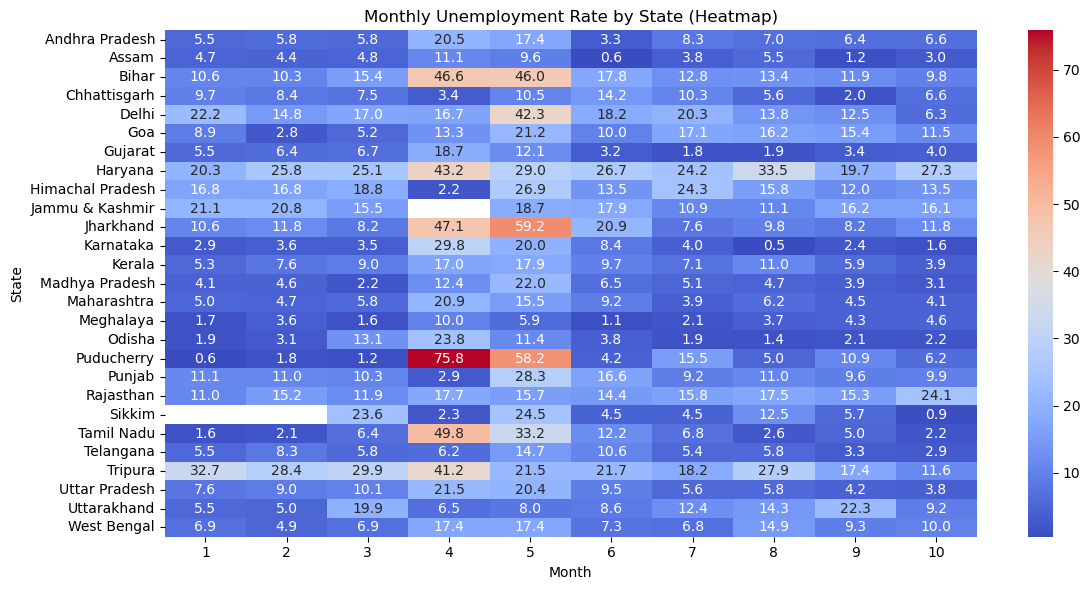

In [22]:
#Heatmap - Unemployment rate correlation
pivot_df = df2.pivot_table(values="Unemployment Rate", index="State", columns=df2['Date'].dt.month)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Monthly Unemployment Rate by State (Heatmap)")
plt.xlabel("Month")
plt.ylabel("State")
plt.tight_layout()
plt.show()


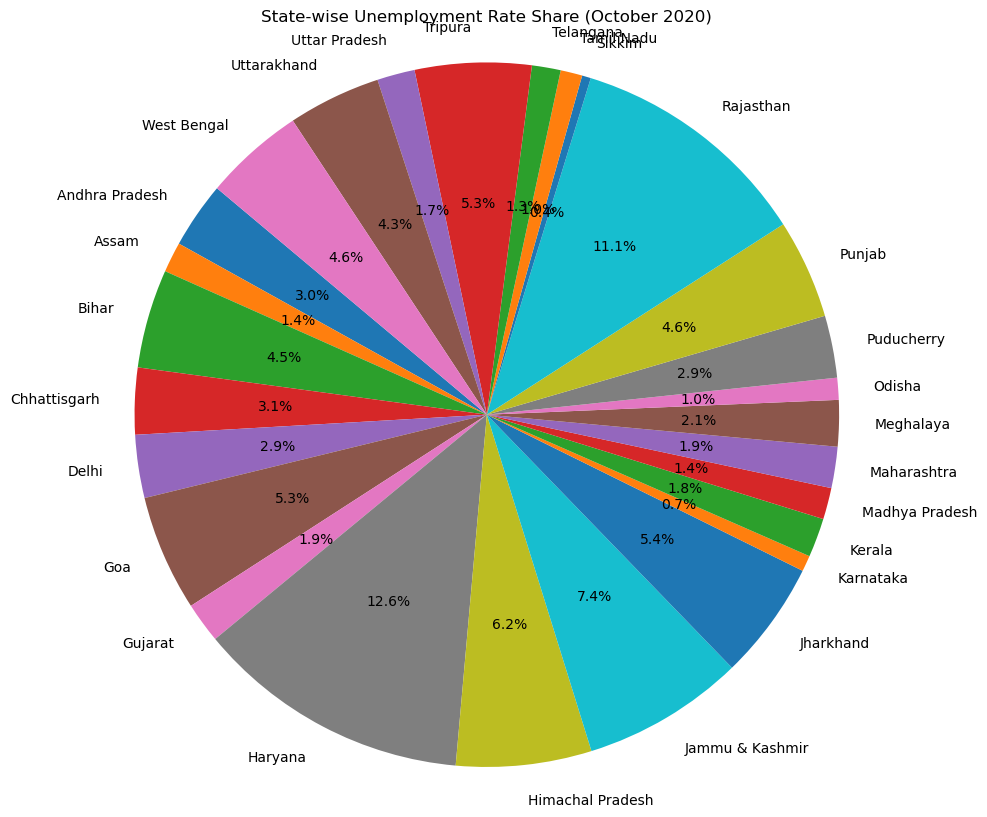

In [24]:
#Pie Chart - Contribution of states to total unemployment (approx)
latest_month = df2['Date'].max()
latest_data = df2[df2['Date'] == latest_month]
plt.figure(figsize=(10, 10))
plt.pie(latest_data['Unemployment Rate'], labels=latest_data['State'], autopct='%1.1f%%', startangle=140)
plt.title(f"State-wise Unemployment Rate Share ({latest_month.strftime('%B %Y')})")
plt.axis("equal")
plt.show()

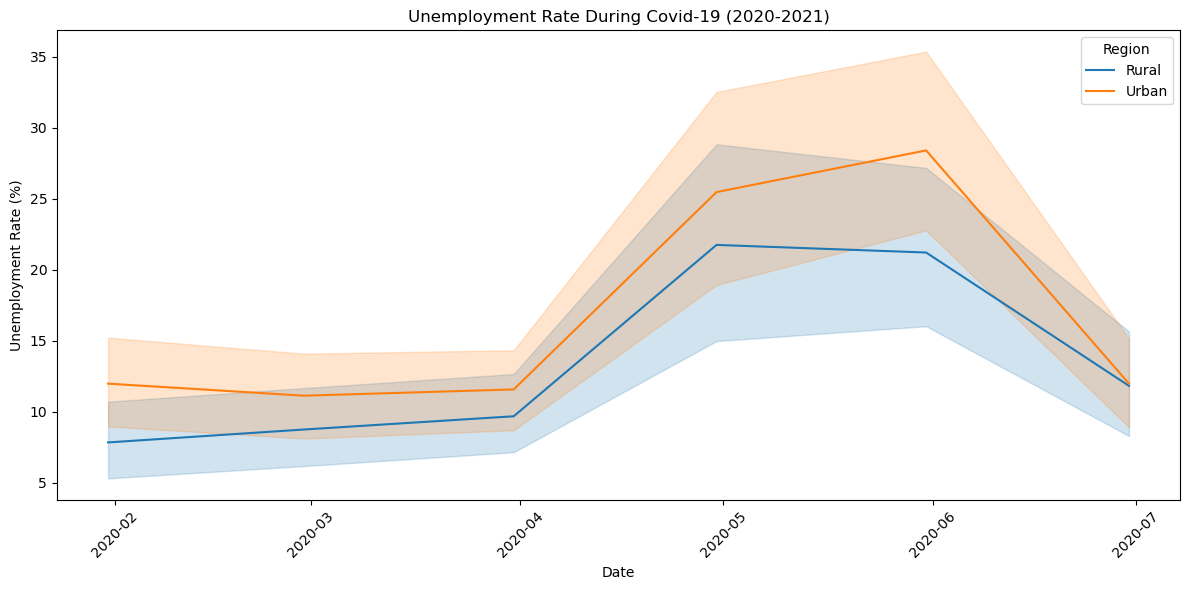

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(data=covid_period, x='Date', y='Estimated Unemployment Rate', hue='Region')
plt.title('Unemployment Rate During Covid-19 (2020-2021)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
monthly = df.resample('ME', on='Date')[['Estimated Unemployment Rate']].mean()

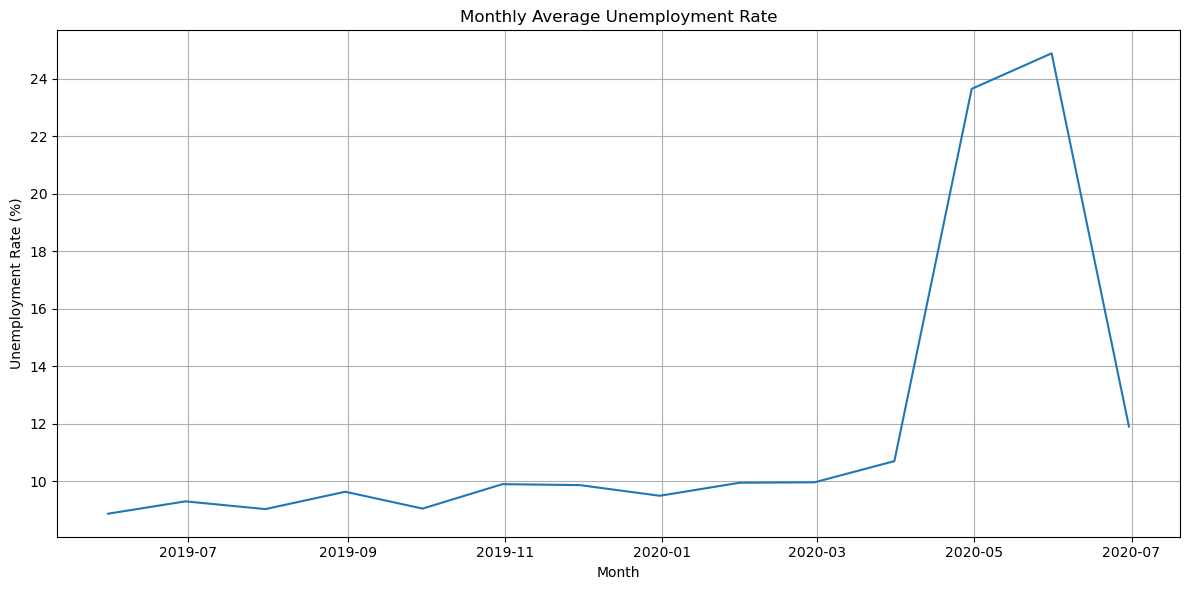

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Date', y='Estimated Unemployment Rate')
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.tight_layout()
plt.show()